<a href="https://colab.research.google.com/github/Pradhan14102003/Python-Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y (1).csv")

X_test = pd.read_csv("test_X (1).csv")
Y_test = pd.read_csv("test_Y.csv")

In [ ]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [ ]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [ ]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [ ]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def model(X, Y, learning_rate, iterations):

    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B = 0

    cost_list = []

    for i in range(iterations):

        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)

    return W, B, cost_list


In [26]:
iterations = 1000
learning_rate = 0.0001
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  100 iteration is :  0.6329407441879008
cost after  200 iteration is :  0.6283016668216386
cost after  300 iteration is :  0.6274409636379799
cost after  400 iteration is :  0.6270098397006475
cost after  500 iteration is :  0.626637519513168
cost after  600 iteration is :  0.6262757869482969
cost after  700 iteration is :  0.6259179917501874
cost after  800 iteration is :  0.625563174262347
cost after  900 iteration is :  0.625211171329765


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


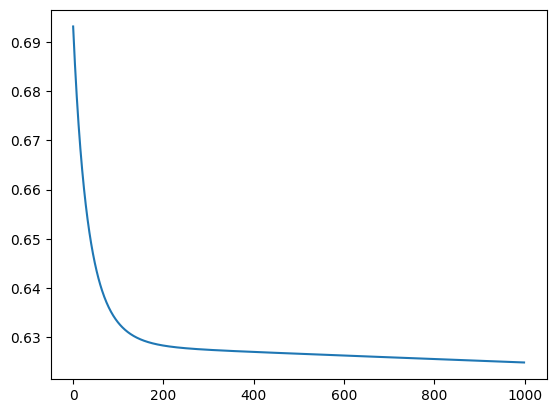

In [27]:
plt.plot(np.arange(iterations), cost_list)
#plt.scatter(X_test,Y_test,c='r')
y_range = np.array(range(-10,10))
X_range = [x / 10.0 for x in range(0,11,1)]
print(X_range)
print(y_range)
#print(y.shape)


plt.show()

In [29]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")

In [30]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  65.31 %
